In [2]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
N, D, H=64,1000,100
x=tf.placeholder(tf.float32, shape=(N,D))
y=tf.placeholder(tf.float32, shape=(N,D))
w1=tf.Variable(tf.random_normal((D,H)))
w2=tf.Variable(tf.random_normal((H,D)))
h=tf.maximum(tf.matmul(x,w1),0)
y_pred=tf.matmul(h,w2)
diff=y_pred-y
loss=tf.reduce_mean(tf.reduce_sum(diff**2,axis=1))
grad_w1,grad_w2=tf.gradients(loss,[w1,w2])
learning_rate=1e-3
grad_squared1=0
grad_squared2=0
decay_rate=0.99
grad_squared1 = decay_rate * grad_squared1 + (1-decay_rate) * grad_w1 * grad_w1
grad_squared2 = decay_rate * grad_squared2 + (1-decay_rate) * grad_w2 * grad_w2
x_w1 = w1 - learning_rate * grad_w1 / (tf.sqrt(grad_squared1) + 1e-7)
x_w2 = w2 - learning_rate * grad_w2 / (tf.sqrt(grad_squared2) + 1e-7)
new_w1 = w1.assign(x_w1)
new_w2 = w2.assign(x_w2)
updates = tf.group(new_w1,new_w2)


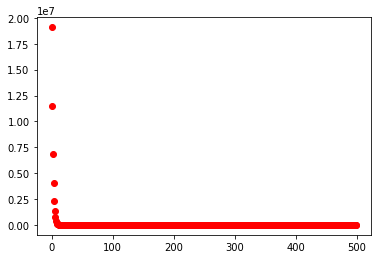

11512617.0 331.58557


In [5]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    values = {x: np.random.rand (N, D), y: np.random.rand (N, D)}
    steps = 500
    loss_summary = []
    for i in range(steps):
        out,_ = sess.run([loss, updates], feed_dict=values)
        loss_val = out
        loss_summary.append(loss_val)
    plt.plot(range(steps), loss_summary, 'ro', label='loss_val')
    plt.show()
    print(loss_summary[1],loss_summary[steps-1])